In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

## Load the data

In [3]:
# original dataset https://data.world/vlad/credit-card-fraud-detection
data = pd.read_csv('datasets/credit-cards-fraud-detection.csv')

In [4]:
data.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,142404.000000,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,82216.843396,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,1.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,71202.500000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,142404.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,213605.500000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,284807.000000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# drop redundant columns
data.drop(columns=['Time', 'Unnamed: 0'], inplace=True)

In [6]:
data.head()  # categoric and numeric features (continous and discrite)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# rename column
data.rename(columns={'Class': 'isFraud'}, inplace=True)

In [8]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,isFraud
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### How many anomalies are in the data set

In [9]:
n_normal_data = data['isFraud'].value_counts()[0]
n_anomalies = data['isFraud'].value_counts()[1]
print(f'Data set contains: {n_normal_data} normal observations and anomalies: {n_anomalies}')
print('Contamination: {}%'.format(round(n_anomalies/n_normal_data, 4)))

Data set contains: 284315 normal observations and anomalies: 492
Contamination: 0.0017%


In [10]:
# remap isFraud column values, because the IsolationForest algorithm assigns a '-1' label for anomalies and '1' for normal observations 
data["isFraud"] = data["isFraud"].map({1: -1, 0: 1})

In [11]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,isFraud
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1


## Isolation Forest algorithm

In [12]:
X, y = data.loc[:,:'Amount'], data.loc[:,'isFraud':]

Declare Isolation Forest algoirthm with appropriate parameters. We set contamination parameter to 'auto' as in real world most of the time we don't know the amount of anomalies/outliers in our dataset.

In [13]:
%%time
model = IsolationForest(contamination='auto',
                        max_features = 3,
                        max_samples = 256,
                        n_jobs = -1,  # use all cpu cores
                        n_estimators=300)
data["isAnomaly"] = model.fit_predict(X)

Wall time: 25.2 s


In [14]:
data["isAnomaly"].value_counts()

 1    273221
-1     11586
Name: isAnomaly, dtype: int64

Model predictions

In [15]:
n_normal_data = data['isAnomaly'].value_counts()[1]
n_anomalies = data['isAnomaly'].value_counts()[-1]
predicted_contamination = round(n_anomalies/n_normal_data, 4)

print(f'According to model predictions, data set contains: {n_normal_data} normal observations and anomalies: {n_anomalies}')
print('Contamination: {}%'.format(predicted_contamination))

According to model predictions, data set contains: 273221 normal observations and anomalies: 11586
Contamination: 0.0424%


In [16]:
# add column with scores for each observation - how the model is certain that the observation is an outlier
data['anomaly_score'] = model.score_samples(X)

In [17]:
print(f'Observation score below which model decides it is an anomaly: {model.offset_}')

Observation score below which model decides it is an anomaly: -0.5


## Plot score distribution

In [18]:
def plt_score_distribution(threshold):
    ax = data['anomaly_score'].hist(bins=40)

    mean = data['anomaly_score'].mean()
    ax.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    plt.text(mean, 30000, 'Mean:\n{:.4f}'.format(mean), color='r', size=18)
    ax.axvline(threshold, color='b', linestyle='dashed', linewidth=2)
    plt.text(threshold, 25000, 'Threshold:\n{:.4f}'.format(threshold), color='b', size=18)

### Plot anomaly score distribution and threshold 

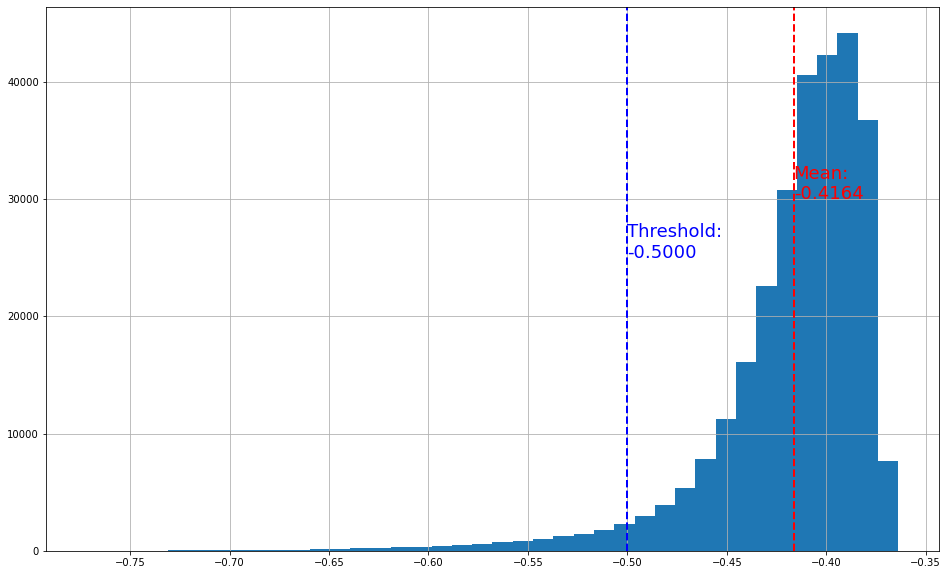

In [19]:
# original treshold
plt.figure(figsize = (16, 10))
plt_score_distribution(model.offset_)

## Score model

In [20]:
from sklearn.metrics import precision_score, accuracy_score, recall_score

To score the model we need to once again remap anomaly labels for two columns: predicted by the model and original one

In [34]:
# remap annomaly label to calculate metric scores
data['isFraud'] = data['isFraud'].map({1: 0, -1: 1})
data['isAnomaly'] = data['isAnomaly'].map({1: 0, -1: 1})

In [22]:
def score_model(predictions, real):
    print('Model predictions for anomalies:')
    print('Precision: ', precision_score(real, predictions))
    print('Accuracy: ', accuracy_score(real, predictions))
    print('Recall: ', recall_score(real, predictions))

In [23]:
score_model(data['isAnomaly'], data['isFraud'])

Model predictions for anomalies:
Precision:  0.035301225617124114
Accuracy:  0.9604644548764601
Recall:  0.8313008130081301


### Create confusion matrix of predictions

In [24]:
cf = pd.crosstab(data['isAnomaly'],
                 data['isFraud'],
                 colnames=['Real'],
                 rownames=['Predicted'])

In [25]:
cf

Real,0,1
Predicted,,
0,273138,83
1,11177,409


### Results interpretation

Model did handled well the outlier detection since the recall score (amount of outliers predicted by the model and the real outliers in the data set) is fairly high. On the other hand, the precison score of the model is low meaning that a lot of transactions were incorectly classified as outliers.

To achieve better scores we can tune model's parameters or modify the threshold for which observation is considered as outlier.

## Modyfying threshold with IQR rule

In [26]:
def iqr_bounds(scores, k=1.5):
    q1 = scores.quantile(0.25)
    q3 = scores.quantile(0.75)
    iqr = q3 - q1
    lower_bound=(q1 - k * iqr)
    upper_bound=(q3 + k * iqr)  # we need only lower bound since our scores are outlier samples have negative score
    print("Modified threshold is:{}".format(lower_bound))
    return lower_bound

modified_threshold=iqr_bounds(data['anomaly_score'], k=1.5)

Modified threshold is:-0.48875051645384426


### Assign new anomaly labels using new threshold

In [27]:
conditions  = [
    (data['anomaly_score'] < modified_threshold)
]
choices = [1]
    
data['isAnomaly_new_threshold'] = np.select(conditions, choices, default=0)

In [28]:
n_normal_data = data['isAnomaly_new_threshold'].value_counts()[0]
n_anomalies = data['isAnomaly_new_threshold'].value_counts()[1]
predicted_contamination_modified_threshold = round(n_anomalies/n_normal_data, 4)

print(f'According to model predictions with modified threshold, data set contains: {n_normal_data} normal observations and anomalies: {n_anomalies}')
print('Contamination: {}%'.format(predicted_contamination))

According to model predictions with modified threshold, data set contains: 270220 normal observations and anomalies: 14587
Contamination: 0.0424%


Amount of outliers predicted by the model (contamination) has dropped significantly. Now our recall metric should increase, because we assign an outlier label to these observations that have smaller anomaly score.

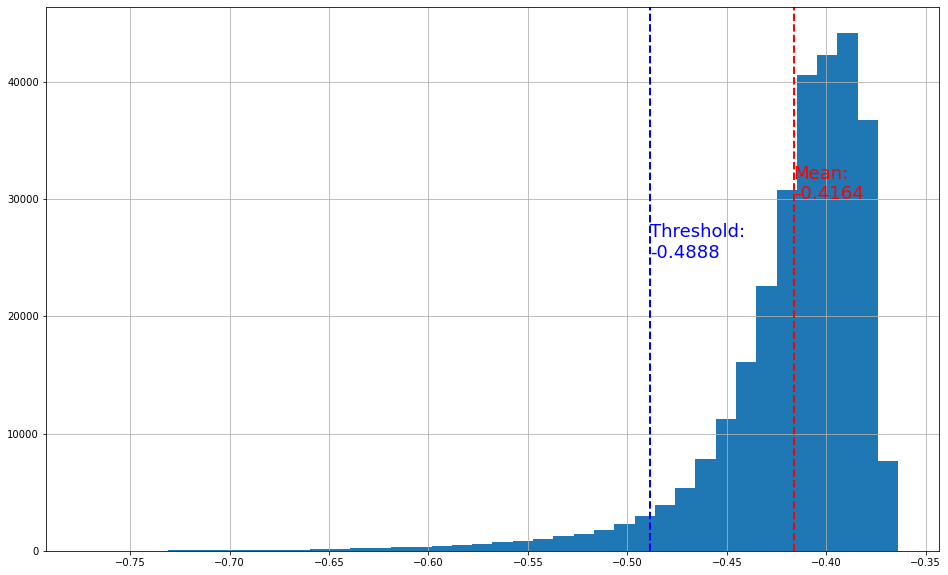

In [29]:
plt.figure(figsize = (16, 10))
plt_score_distribution(modified_threshold)

Let's view our performance metrics one again 

In [30]:
cf = pd.crosstab(data['isAnomaly_new_threshold'],
                 data['isFraud'],
                 colnames=['Real'],
                 rownames=['Predicted'])

In [31]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Amount,isFraud,isAnomaly,anomaly_score,isAnomaly_new_threshold
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,-0.389459,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,-0.375775,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,-0.477707,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,-0.417319,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,-0.401350,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1,-0.634303,1
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0,-0.419115,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0,-0.404196,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0,-0.432620,0


In [32]:
cf

Real,0,1
Predicted,,
0,270145,75
1,14170,417


In [33]:
score_model(data['isAnomaly_new_threshold'], data['isFraud'])

Model predictions for anomalies:
Precision:  0.02858709810104888
Accuracy:  0.9499836731541008
Recall:  0.8475609756097561


The recall has indeed increased, but we still do not get satisfactory results with precision. We may need to tune our model with new parameters or choose different algorithm.